# Nasa

In [ ]:
!pip install lxml

In [ ]:
!pip install zeep

In [10]:
!pip install "sunpy[all]"

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.9/961.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.8/992.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.3 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5050 sha256=1413b19a086c6e9233b85dd8c0c6800116f9293aea4556af779eb0ae686db310
  Stored in directory: /Users/beatrizduque/Library/Caches/pip/wheels/07/00/bc/937e878be0d781a569792a1e0

In [1]:
!pip install sunpy drms zeep lxml matplotlib pillow


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [5]:
import matplotlib.pyplot as plt
from sunpy.net import Fido, attrs as a
from sunpy.map import Map
import numpy as np
from tqdm import tqdm

In [8]:
# Função para baixar e processar as imagens
def baixar_processar_dia(data, instrumento='HMI', physobs='intensity', wavelength=None):
    # Buscar imagens HMI Intensitygram (luz visível)
    result = Fido.search(
        a.Time(f'{data} 00:00', f'{data} 23:59'),
        a.Instrument(instrumento),
        a.Physobs(physobs),  # Observação de intensidade (imagem em luz visível)
        a.Level(1)  # Dados calibrados de nível 1
    )
    
    print(f'Encontrados {len(result)} arquivos para {data}')
    
    # Baixar os arquivos
    downloaded_files = Fido.fetch(result)
    
    # Lista para armazenar as médias de intensidade (irradiância simulada)
    irradiancia = []
    horarios = []
    
    # Processar cada imagem
    for file in tqdm(downloaded_files, desc=f"Processando imagens de {data}"):
        try:
            mapa = Map(file)
            # Calcular a média de intensidade (simula a irradiância visível)
            media_intensidade = np.mean(mapa.data)
            irradiancia.append(media_intensidade)
            
            # Extrair o horário da imagem
            horario = mapa.date.datetime
            horarios.append(horario)
        except Exception as e:
            print(f"Erro ao processar {file}: {e}")
    
    return horarios, irradiancia

Encontrados 0 arquivos para 2023-07-23


Files Downloaded: 0file [00:00, ?file/s]
Processando imagens de 2023-07-23: 0it [00:00, ?it/s]


Encontrados 0 arquivos para 2023-07-20


Files Downloaded: 0file [00:00, ?file/s]
Processando imagens de 2023-07-20: 0it [00:00, ?it/s]


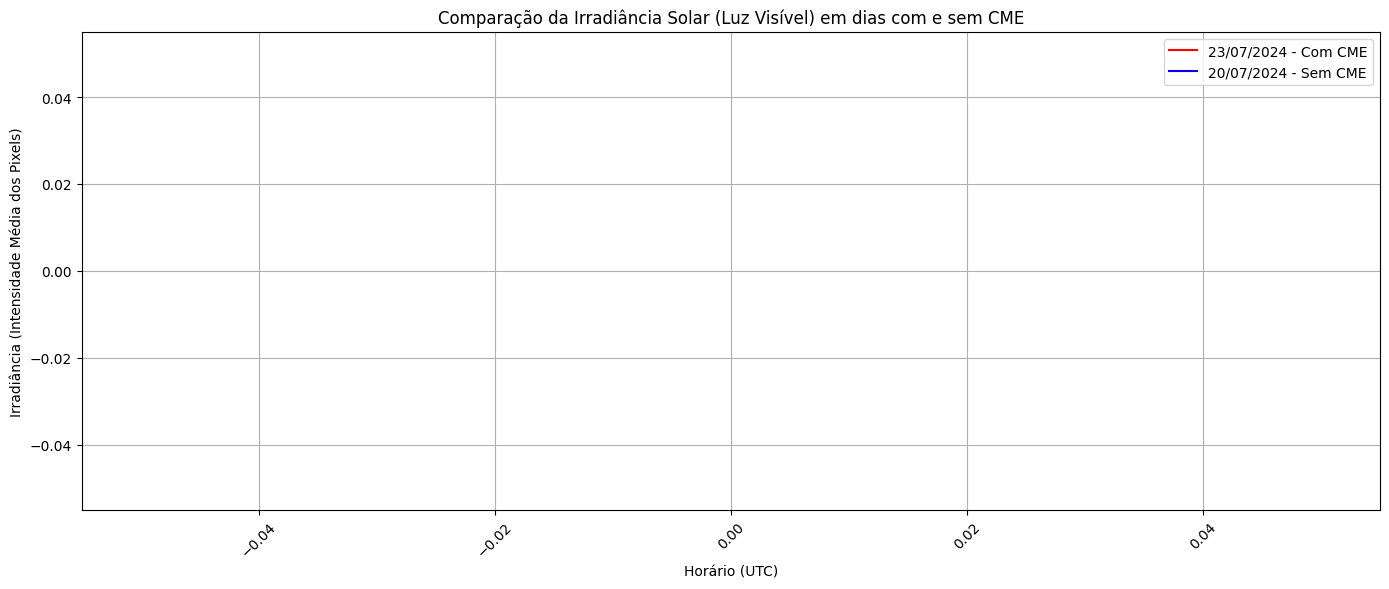

In [10]:
# ✅ Pegar dados para o dia COM CME (23/07/2024)
horarios_cme, irradiancia_cme = baixar_processar_dia("2023-07-23")

# ✅ Pegar dados para o dia SEM CME (20/07/2024)
horarios_sem_cme, irradiancia_sem_cme = baixar_processar_dia("2023-07-20")

# ✅ 3. Plotar as curvas de luz

plt.figure(figsize=(14, 6))
plt.plot(horarios_cme, irradiancia_cme, label='23/07/2024 - Com CME', color='red')
plt.plot(horarios_sem_cme, irradiancia_sem_cme, label='20/07/2024 - Sem CME', color='blue')

plt.xlabel('Horário (UTC)')
plt.ylabel('Irradiância (Intensidade Média dos Pixels)')
plt.title('Comparação da Irradiância Solar (Luz Visível) em dias com e sem CME')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
!pip install sunpy
!pip install zeep
!pip install lxml


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [15]:
from sunpy.net import Fido, attrs as a

# Buscar QUALQUER dado de LASCO nesse dia, sem restringir o detector
results = Fido.search(
    a.Time("2024-07-23", "2024-07-23 23:59"),
    a.Instrument('LASCO')
)

print(results)

Results from 0 Providers:




In [16]:
results = Fido.search(
    a.Time("2017-09-06", "2017-09-06 23:59"),
    a.Instrument('LASCO')
)

print(results)

Results from 1 Provider:

237 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 480.82 Mbyte

       Start Time               End Time        Source ... Extent Type   Size 
                                                       ...              Mibyte
----------------------- ----------------------- ------ ... ----------- -------
2017-09-06 00:00:05.000 2017-09-06 00:00:30.000   SOHO ...      CORONA 2.01074
2017-09-06 00:06:05.000 2017-09-06 00:06:22.000   SOHO ...      CORONA 2.01074
2017-09-06 00:12:05.000 2017-09-06 00:12:30.000   SOHO ...      CORONA 2.01074
2017-09-06 00:18:05.000 2017-09-06 00:18:22.000   SOHO ...      CORONA 2.01074
2017-09-06 00:24:05.000 2017-09-06 00:24:30.000   SOHO ...      CORONA 2.01074
2017-09-06 00:30:05.000 2017-09-06 00:30:22.000   SOHO ...      CORONA 2.01074
2017-09-06 00:36:05.000 2017-09-06 00:36:30.000   SOHO ...      CORONA 2.01074
2017-09-06 00:42:05.000 2017-09-06 00:42:22.000   SOHO ...      CORON

# SOHO

In [17]:
import matplotlib.pyplot as plt
from sunpy.net import Fido, attrs as a
from sunpy.map import Map
import numpy as np

def baixar_processar_lasco(data, detector="LASCO", instrument=None):
    print(f"🔍 Buscando dados LASCO {instrument if instrument else ''} para o dia {data}...")

    # Busca ajustada
    search_attrs = [
        a.Time(f"{data} 00:00", f"{data} 23:59"),
        a.Instrument(detector)
    ]

    if instrument:
        search_attrs.append(a.Detector(instrument))  # Só adiciona detector se especificado

    results = Fido.search(*search_attrs)

    if len(results) == 0:
        print(f"❌ Nenhum dado encontrado para o dia {data}.")
        return [], []  # Retornar listas vazias, para não dar erro

    print(f"✅ {len(results[0])} arquivos encontrados. Iniciando download...")

    # Baixar arquivos
    downloaded_files = Fido.fetch(results)

    print("✅ Download finalizado. Processando imagens...")

    irradiancias = []
    horarios = []

    # Processar cada imagem
    for file in downloaded_files:
        try:
            mapa = Map(file)
            data_array = mapa.data

            # Calcular o brilho médio
            irradiancia_media = np.mean(data_array)

            # Horário da imagem
            horario_img = mapa.date.datetime

            irradiancias.append(irradiancia_media)
            horarios.append(horario_img)
        except Exception as e:
            print(f"⚠️ Erro ao processar {file}: {e}")

    print(f"✅ Processamento completo para {data}. {len(irradiancias)} pontos de dados extraídos.")
    return horarios, irradiancias


Sim, os dados que você está acessando, especialmente os do SOHO/LASCO, são de imagens do Sol em luz visível (ou mais precisamente, radiação visível ou na faixa de comprimento de onda da luz visível) e capturam as emissões relacionadas a eventos solares como erupções e ejeções de massa coronal (CME). Elas são usadas para observar a corona solar e a atividade solar em geral, que são as camadas exteriores do Sol, onde eventos como CMEs podem ocorrer.

Se você estiver usando o LASCO C2 ou C3, essas imagens correspondem à luz visível no espectro, mas com uma observação mais voltada para a corona, e não necessariamente a luz visível direta que vemos na superfície do Sol.

### Solar monitor 
https://solarmonitor.org/goes_pop.php?date=20170906&type=xray&region=

*HALO*

https://cdaw.gsfc.nasa.gov/CME_list/UNIVERSAL_ver2/2017_09/univ2017_09.html
https://cdaw.gsfc.nasa.gov/movie/make_javamovie.php?stime=20170906_1109&etime=20170906_1453&img1=lasc2rdf&title=20170906.122405.p201g;V=1571km/s
https://cdaw.gsfc.nasa.gov/CME_list/daily_plots/sephtx/2017_09/sephtx_20170906.png

*Flares*

https://www.spaceweatherlive.com/en/archive/2017/09/09/xray.html

🔍 Buscando dados LASCO C2 para o dia 2017-09-06...
✅ 124 arquivos encontrados. Iniciando download...


Files Downloaded: 100%|██████████| 124/124 [00:18<00:00,  6.74file/s]
 [astropy.io.fits.verify]


✅ Download finalizado. Processando imagens...


✅ Processamento completo para 2017-09-06. 124 pontos de dados extraídos.
🔍 Buscando dados LASCO C2 para o dia 2017-09-04...
✅ 124 arquivos encontrados. Iniciando download...


Files Downloaded: 100%|██████████| 124/124 [00:18<00:00,  6.58file/s]
 [astropy.io.fits.verify]


✅ Download finalizado. Processando imagens...


✅ Processamento completo para 2017-09-04. 124 pontos de dados extraídos.


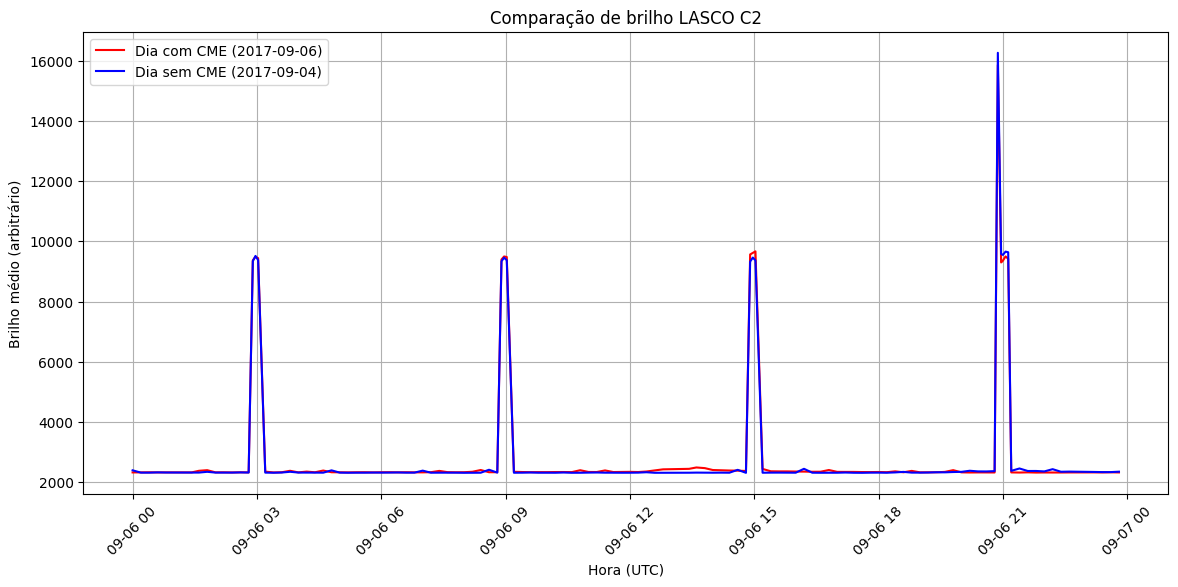

In [19]:
# Teste com data que tem certeza que tem LASCO/CME
horarios_cme, irradiancia_cme = baixar_processar_lasco("2017-09-06", instrument="C2")
horarios_sem_cme, irradiancia_sem_cme = baixar_processar_lasco("2017-09-04", instrument="C2")  # Data sem CME

# Gráfico
plt.figure(figsize=(14, 6))
if horarios_cme and irradiancia_cme:
    plt.plot(horarios_cme, irradiancia_cme, label='Dia com CME (2017-09-06)', color='red')
if horarios_sem_cme and irradiancia_sem_cme:
    plt.plot(horarios_cme, irradiancia_sem_cme, label='Dia sem CME (2017-09-04)', color='blue')
plt.legend()
plt.title("Comparação de brilho LASCO C2")
plt.ylabel("Brilho médio (arbitrário)")
plt.xlabel("Hora (UTC)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


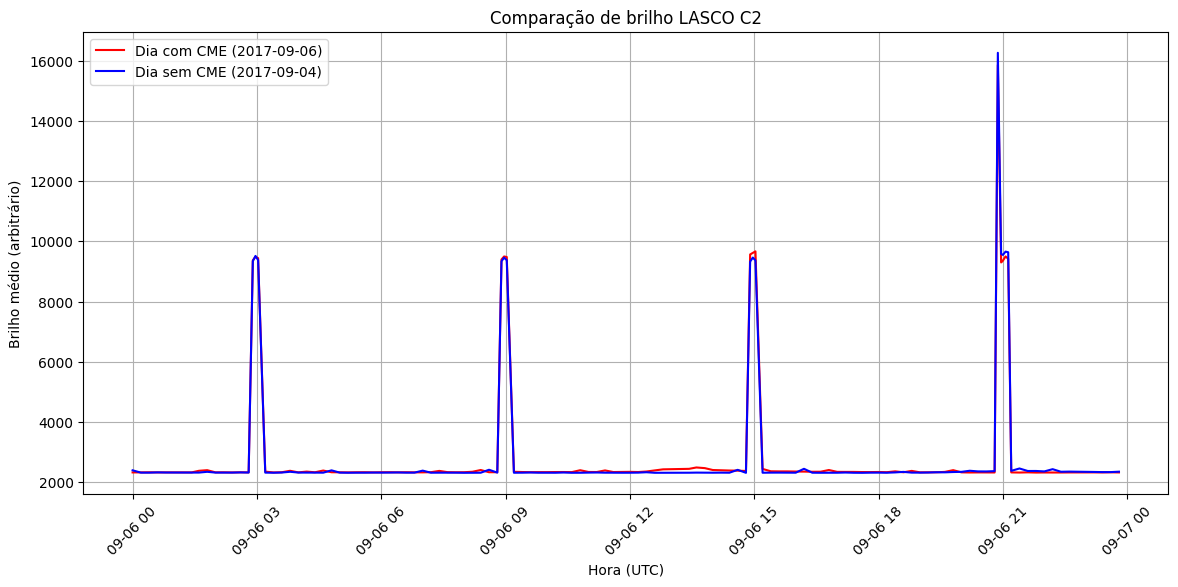

In [20]:
# Gráfico
plt.figure(figsize=(14, 6))
if horarios_cme and irradiancia_cme:
    plt.plot(horarios_cme, irradiancia_cme, label='Dia com CME (2017-09-06)', color='red')
if horarios_sem_cme and irradiancia_sem_cme:
    plt.plot(horarios_cme, irradiancia_sem_cme, label='Dia sem CME (2017-09-04)', color='blue')

    
plt.legend()
plt.title("Comparação de brilho LASCO C2")
plt.ylabel("Brilho médio (arbitrário)")
plt.xlabel("Hora (UTC)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

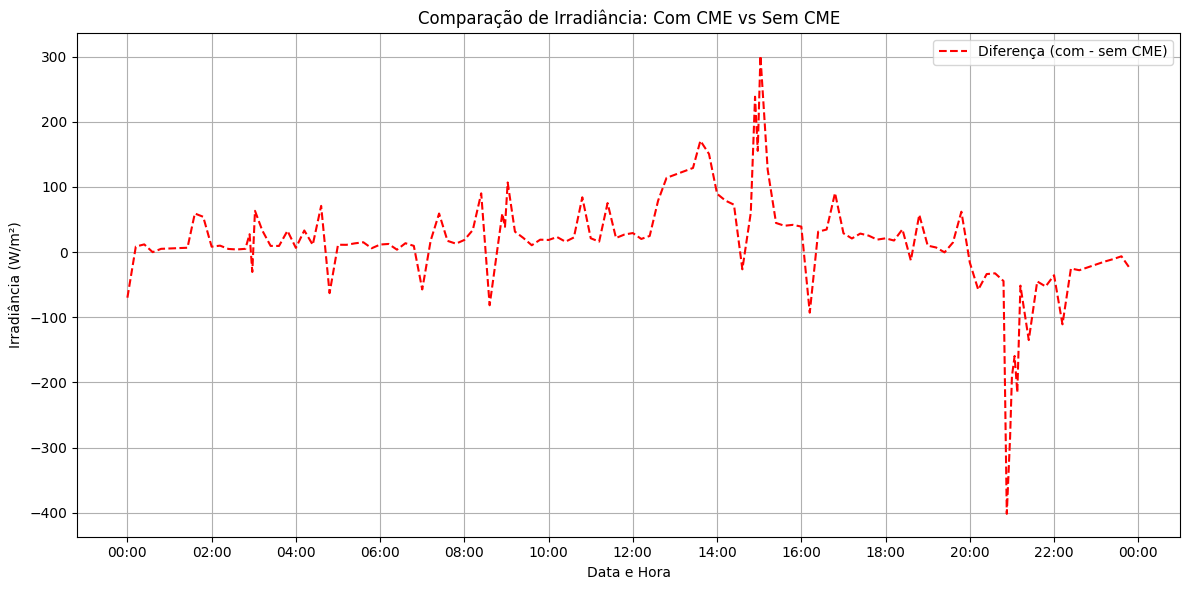

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Adicione esta linha para importar mdates

# Converter para pandas Series, se necessário
irradiancia_cme = pd.Series(irradiancia_cme)
irradiancia_sem_cme = pd.Series(irradiancia_sem_cme)

# Exemplo: Subtração da irradiância do dia com CME pela irradiância do dia sem CME
diferenca_irradiancia = irradiancia_cme - irradiancia_sem_cme

# Plotando a comparação
plt.figure(figsize=(12, 6))

# Plot da diferença (ruído)
plt.plot(horarios_cme, diferenca_irradiancia, label='Diferença (com - sem CME)', color='red', linestyle='--')

# Configurações do gráfico
plt.xlabel('Data e Hora')
plt.ylabel('Irradiância (W/m²)')
plt.title('Comparação de Irradiância: Com CME vs Sem CME')
plt.legend()
plt.grid(True)

# Formatação do eixo x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))

# Exibir o gráfico
plt.tight_layout()
plt.show()


A ejeção de massa coronal (CME) de 06 de setembro de 2017 foi um evento notável que ocorreu a partir de uma erupção solar muito forte, classificada como um flare de classe X9.3. A CME foi uma das mais poderosas observadas nos últimos anos.

A ejeção de massa coronal desse dia ocorreu por volta de 12:00 UTC (Coordinated Universal Time). Ela foi lançada a partir da região ativa AR2673 do Sol, e a atividade foi monitorada de perto por telescópios e satélites solares, como o SOHO.

Então, para acompanhar o evento ou comparar dados, 12:00 UTC seria o horário aproximado do início da ejeção de massa coronal de 06/09/2017.

Se precisar de mais detalhes sobre esse evento ou sobre como acessar dados relacionados, posso te ajudar com isso também